# Modelación de flujo de agua subterránea en un medio heterogéneo/Planta

In [33]:
from __future__ import print_function
from fenics import *
import numpy as np
import random as ra
import matplotlib.pyplot as plt
import sys

In [34]:
mesh= RectangleMesh(Point(0,0),Point(200,100),20,10)
V = FunctionSpace(mesh, 'P', 1)

In [35]:
# Se definen las condiciones de fronteras

mesh= RectangleMesh(Point(0,0),Point(200,100),20,10)
V = FunctionSpace(mesh, 'P', 1)

# Se definen las condiciones de fronteras

def frontera_D(x,frontera):
 tol=1E-14 
 if frontera:
  if abs(x[0]-200)<=tol: 
   return True
  else:
   return False 
 else:
  return False  

def frontera_I(x,frontera):
 tol=1E-14 
 if frontera:
  if abs(x[0])<=tol: 
   return True
  else:
   return False 
 else:
  return False

F_I = DirichletBC(V, Constant(100), frontera_I)
F_D = DirichletBC(V, Constant(10), frontera_D)
bc = [F_I,F_D]


In [36]:
# Se define la heterogeneidad

class K(UserExpression):
 def set_k_values(self, k_0, k_1):
     self.k_0, self.k_1 = k_0, k_1
 def eval(self, value, x):
   tol = 1E-14 
   if  x[0] <= 100 + tol:
      value[0] = self.k_0
   else:
      value[0] = self.k_1

kappa = K(degree=0)
kappa.set_k_values(10,100)

In [37]:
#Se define el problema variacional

u=TrialFunction(V)
v=TestFunction(V)
f=Constant(0)
a=kappa*dot(grad(u),grad(v))*dx
g=Constant(0)
L=f*v*dx-g*v*ds

In [38]:
# Se realiza el calculo de la solucion

u= Function(V)
solve(a==L,u,bc)


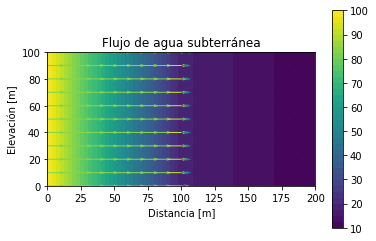

In [39]:
# Ploteo de la solucion
import matplotlib.pyplot as plt
im=plot(u)
#plot(mesh)
#plt.figure()
plot(-grad(u))
plt.colorbar(im)
#plot(mesh)
plt.title('Flujo de agua subterránea')
plt.ylabel('Elevación [m]')
plt.xlabel('Distancia [m]')
plt.show()
